# Definición de trayectorias para el Robot Delta de la UPB

Este cuaderno requiere que el lector comprenda la teoría descrita en:

**https://nbviewer.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/03a_Delta/01_Teoria/RobotDelta_Teoria.ipynb**

y la solución al análisis cinemático inverso en:

**https://nbviewer.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/03a_Delta/02_CinInversa/RobotDelta_CinInv.ipynb**

In [1]:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/8X7KsumRn24','100%','500')

## Objetivo

Definir trayectorias simples y compuestas usando distintas formas de interpolación

## Trayectoria simple

- Problema inicial: hacer que el robot vaya de la posición inicial $HOME$ a $P_1 = [0,0,-650]$ mm siguiendo una línea recta, teniendo en cuenta que $HOME = [0,0,-528 mm]$.


### Importar módulos e inicializar

In [2]:
%reset -sf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#para realizar animaciones
from matplotlib.animation import FuncAnimation
#para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D

### Creación del lienzo 3D

In [4]:
# Gráficas interactivas, descomentar para probar
# %matplotlib

(-800.0, 0.0)

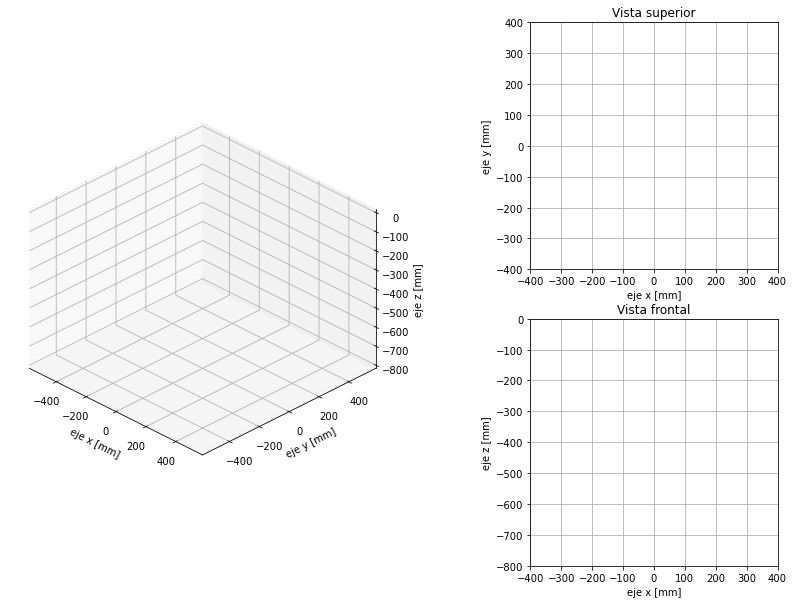

In [5]:
limX = np.array([-400,400])
limY = np.array([-400,400])
limZ = (-800,0)

fig1 = plt.figure(figsize=(15, 10))
ax1 = fig1.add_subplot(2,2,(1,3),projection = '3d', proj_type = 'ortho')
ax1.view_init(elev=30, azim=315)

fEscala = 1.39
ax1.set_xlim3d(limX*fEscala)
ax1.set_ylim3d(limY*fEscala)
ax1.set_zlim3d(-800,0)
ax1.set_xlabel("eje x [mm]")
ax1.set_ylabel("eje y [mm]")
ax1.set_zlabel("eje z [mm]")

ax2 = fig1.add_subplot(2,2,2)
ax2.set_title("Vista superior")
ax2.set_xlabel("eje x [mm]")
ax2.set_ylabel("eje y [mm]")
ax2.axis("scaled")
ax2.grid()
ax2.set_xlim(limX)
ax2.set_ylim(limY)
ax3 = fig1.add_subplot(2,2,4)
ax3.set_title("Vista frontal")
ax3.set_xlabel("eje x [mm]")
ax3.set_ylabel("eje z [mm]")
ax3.axis("scaled")
ax3.grid()
ax3.set_xlim(limX)
ax3.set_ylim(limZ)

### Definición de punto inicial

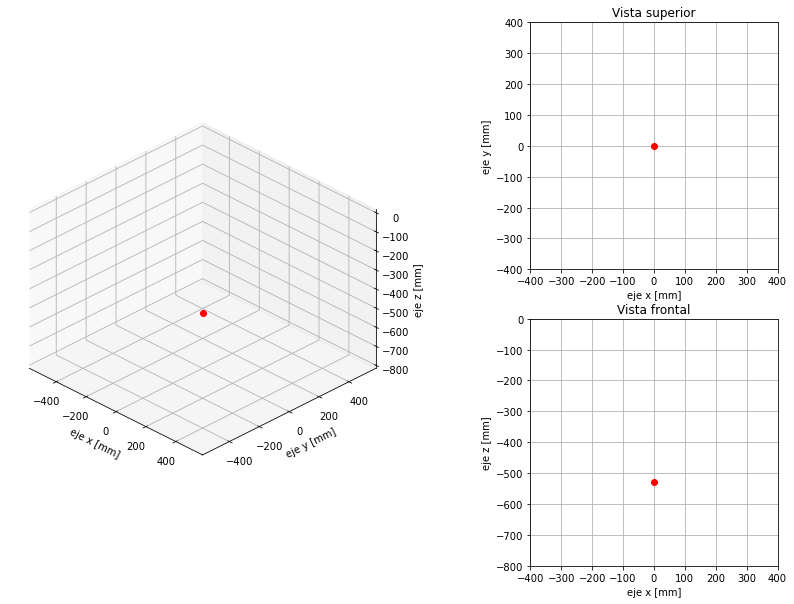

In [6]:
homeX = 0
homeY = 0
homeZ = -528.67

ax1.plot([homeX],[homeY],[homeZ],'ro')
ax2.plot([homeX],[homeY],'ro')
ax3.plot([homeX],[homeZ],'ro')
fig1

### Definición del punto final

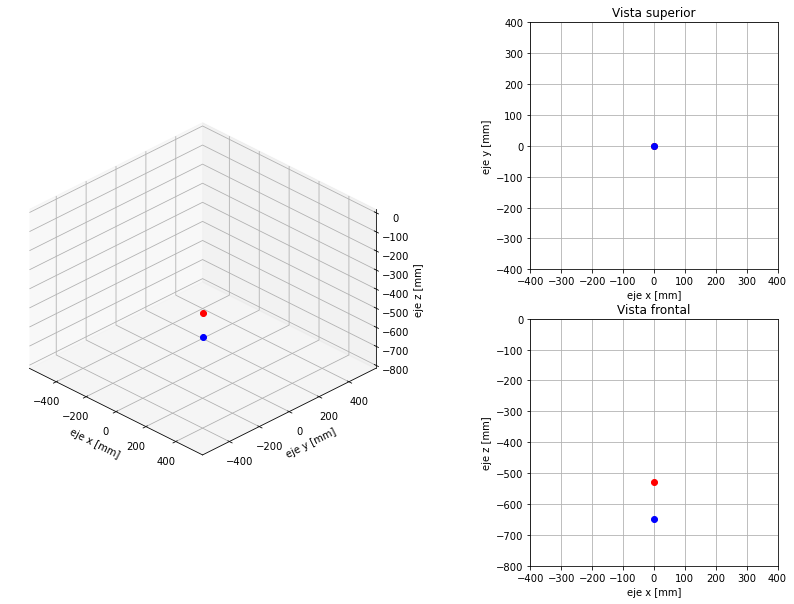

In [7]:
px1 = 0
py1 = 0
pz1 = -650

ax1.plot([px1],[py1],[pz1],'bo')
ax2.plot([px1],[py1],'bo')
ax3.plot([px1],[pz1],'bo')
fig1

### interpolación

Debemos definir un número de puntos intermedios para que el robot pueda desplazarse de forma recta. Para esto usaremos la función de interpolación lineal "linspace". 
- Primero debemos definir el número de puntos intermedios que tendrá la trayectoria, 
- luego usaremos la función en sí.

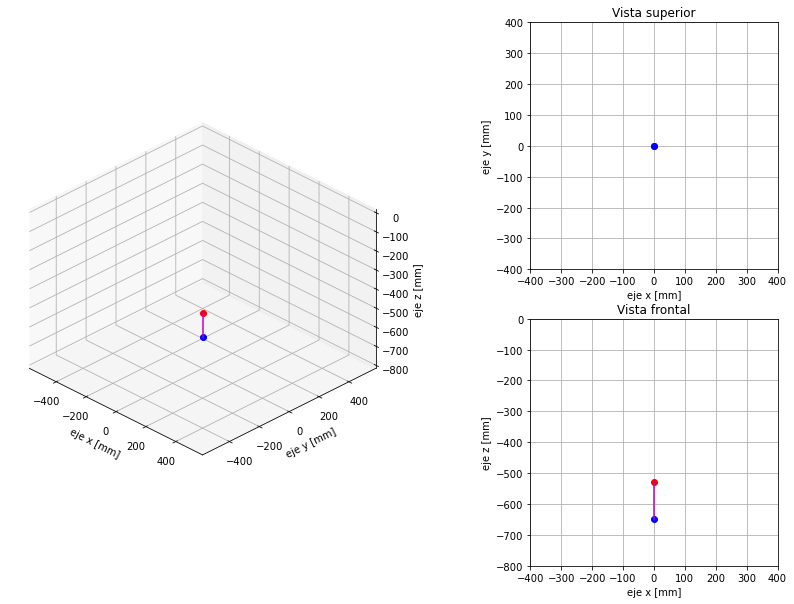

In [8]:
numpos = 40

t1xv = np.linspace(homeX,px1,numpos)
t1yv = np.linspace(homeY,py1,numpos)
t1zv = np.linspace(homeZ,pz1,numpos)

ax1.plot(t1xv,t1yv,t1zv,'-m')
ax2.plot(t1xv,t1yv,'-m')
ax3.plot(t1xv,t1zv,'-m')
fig1

Ahora hagamos una trayectoria para ir a $x = HOME_x+200$ manteniendo la misma posición en $y$ y $z$

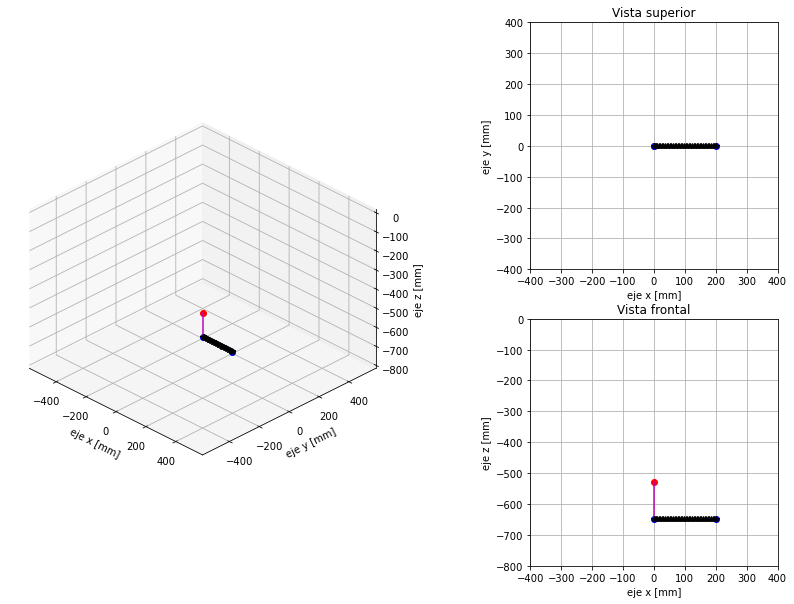

In [9]:
numpos = 40
px2 = 200
py2 = 0
pz2 = pz1

t2xv = np.linspace(px1,px2,numpos)
t2yv = np.linspace(py1,py2,numpos)
t2zv = np.linspace(pz1,pz2,numpos)

ax1.plot([px2],[py2],[pz2],'bo')
ax1.plot(t2xv,t2yv,t2zv,'*k')
ax2.plot([px2],[py2],'bo')
ax2.plot(t2xv,t2yv,'*k')
ax3.plot([px2],[pz2],'bo')
ax3.plot(t2xv,t2zv,'*k')
fig1

## Trayectorias compuestas

se componen de trayectorias simples. Numéricamente, debemos unificar los vectores usando la función "append" de numpy

In [10]:
print("trayectorias individuales: ",t1zv,t2zv)

trayectorias individuales:  [-528.67       -531.78102564 -534.89205128 -538.00307692 -541.11410256
 -544.22512821 -547.33615385 -550.44717949 -553.55820513 -556.66923077
 -559.78025641 -562.89128205 -566.00230769 -569.11333333 -572.22435897
 -575.33538462 -578.44641026 -581.5574359  -584.66846154 -587.77948718
 -590.89051282 -594.00153846 -597.1125641  -600.22358974 -603.33461538
 -606.44564103 -609.55666667 -612.66769231 -615.77871795 -618.88974359
 -622.00076923 -625.11179487 -628.22282051 -631.33384615 -634.44487179
 -637.55589744 -640.66692308 -643.77794872 -646.88897436 -650.        ] [-650. -650. -650. -650. -650. -650. -650. -650. -650. -650. -650. -650.
 -650. -650. -650. -650. -650. -650. -650. -650. -650. -650. -650. -650.
 -650. -650. -650. -650. -650. -650. -650. -650. -650. -650. -650. -650.
 -650. -650. -650. -650.]


In [11]:
txv = np.append(t1xv,t2xv)
tyv = np.append(t1yv,t2yv)
tzv = np.append(t1zv,t2zv)
print("trayectoria compuesta:",tzv)

trayectoria compuesta: [-528.67       -531.78102564 -534.89205128 -538.00307692 -541.11410256
 -544.22512821 -547.33615385 -550.44717949 -553.55820513 -556.66923077
 -559.78025641 -562.89128205 -566.00230769 -569.11333333 -572.22435897
 -575.33538462 -578.44641026 -581.5574359  -584.66846154 -587.77948718
 -590.89051282 -594.00153846 -597.1125641  -600.22358974 -603.33461538
 -606.44564103 -609.55666667 -612.66769231 -615.77871795 -618.88974359
 -622.00076923 -625.11179487 -628.22282051 -631.33384615 -634.44487179
 -637.55589744 -640.66692308 -643.77794872 -646.88897436 -650.
 -650.         -650.         -650.         -650.         -650.
 -650.         -650.         -650.         -650.         -650.
 -650.         -650.         -650.         -650.         -650.
 -650.         -650.         -650.         -650.         -650.
 -650.         -650.         -650.         -650.         -650.
 -650.         -650.         -650.         -650.         -650.
 -650.         -650.         -650.     

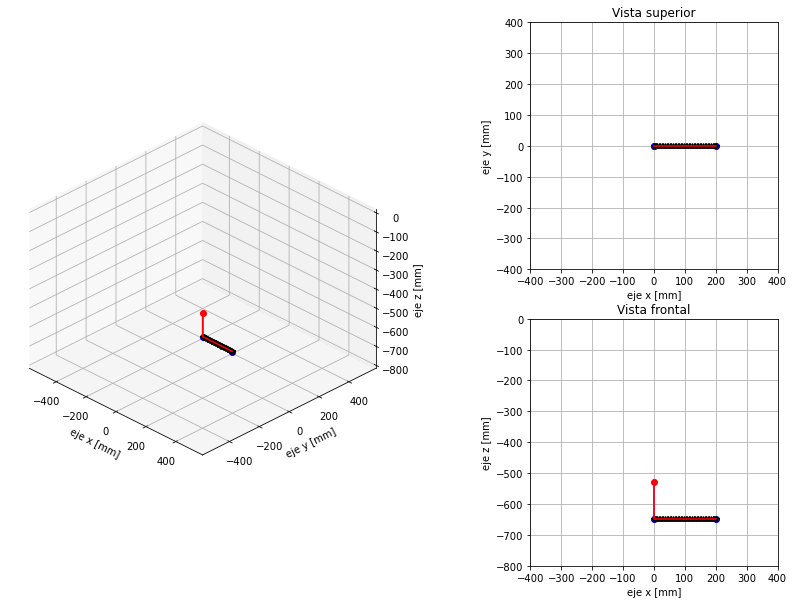

In [12]:
ax1.plot(txv,tyv,tzv,'-r')
ax2.plot(txv,tyv,'-r')
ax3.plot(txv,tzv,'-r')
fig1

### Ejemplo: trayectoria circunferencia

Definir una trayectoria en una circunferencia:
- de radio $r$ mm
- Inicia en P2
- Termina en P3
- Debe tener 20 puntos

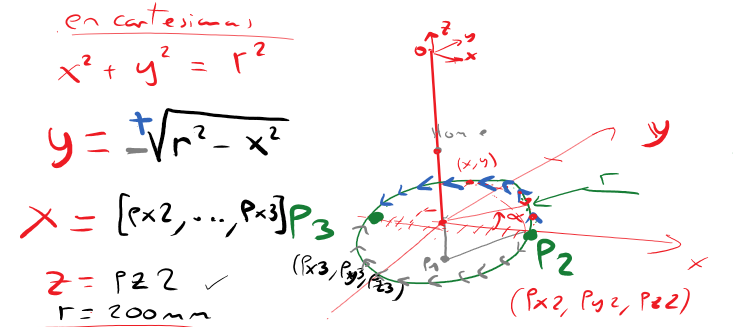

#### En cartesianas

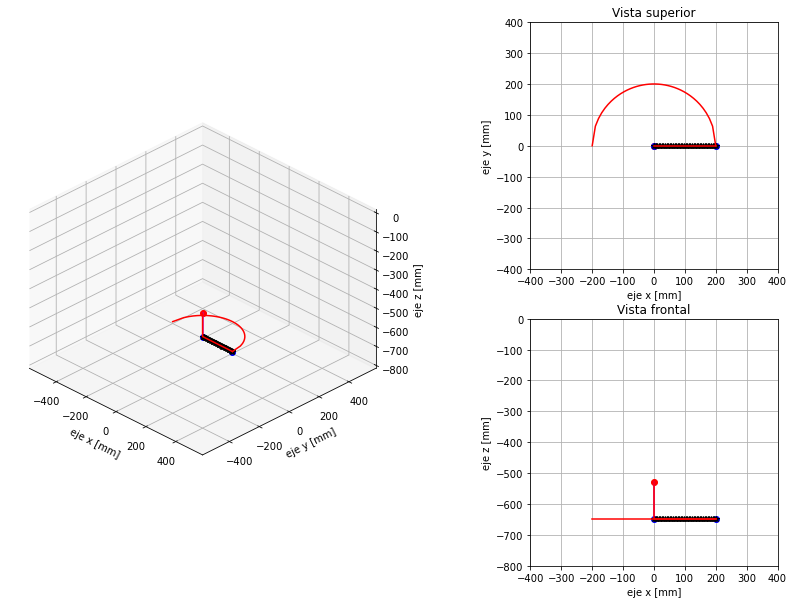

In [13]:
numpos = 40
r = 200
px3 = -r
py3 = 0
pz3 = pz2

t3xv = np.linspace(px2,px3,numpos)
t3yv = np.sqrt(r**2 - t3xv**2)
t3zv = pz3 + np.zeros(numpos)

ax1.plot(t3xv,t3yv,t3zv,'-r')
ax2.plot(t3xv,t3yv,'-r')
ax3.plot(t3xv,t3zv,'-r')
fig1

#### En polares

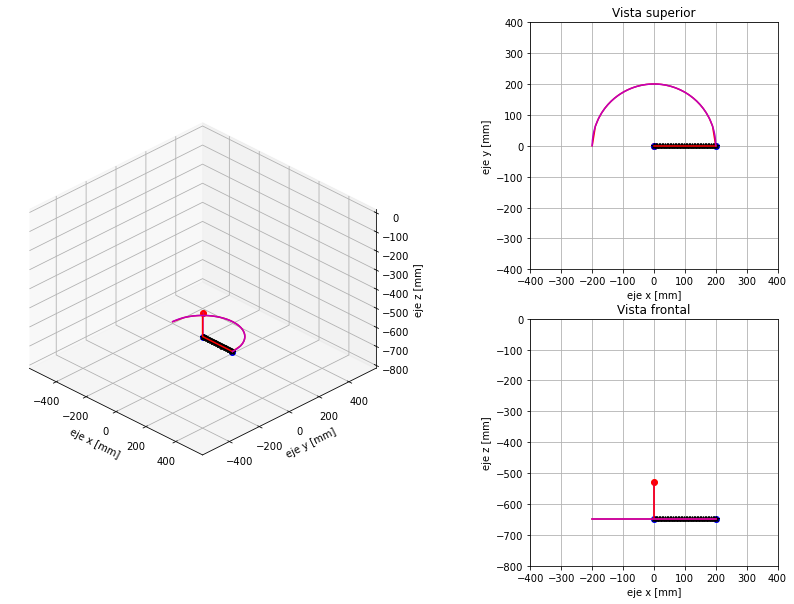

In [14]:
numpos = 40
alpha = np.linspace(0,np.pi,numpos)
t3xv = r*np.cos(alpha)
t3yv = r*np.sin(alpha)
t3zv = pz2 + np.zeros(numpos)

ax1.plot(t3xv,t3yv,t3zv,'-m')
ax2.plot(t3xv,t3yv,'-m')
ax3.plot(t3xv,t3zv,'-m')
fig1

Para la circunferencia completa, sólo debo variar los límites del ángulo $\alpha$

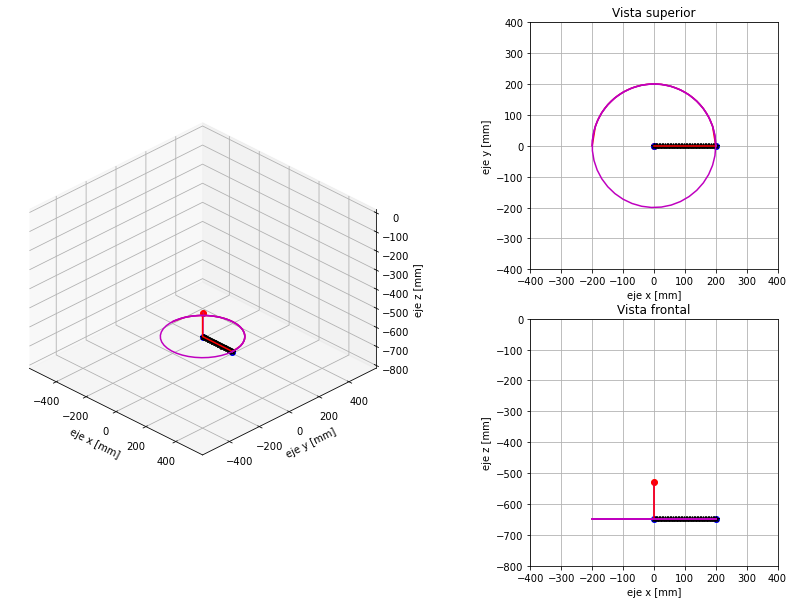

In [15]:
alpha = np.linspace(0,2*np.pi,numpos)
t3xv = r*np.cos(alpha)
t3yv = r*np.sin(alpha)
t3zv = pz2 + np.zeros(numpos)

ax1.plot(t3xv,t3yv,t3zv,'-m')
ax2.plot(t3xv,t3yv,'-m')
ax3.plot(t3xv,t3zv,'-m')
fig1

#### Ahora la trayectoria compuesta incluyendo la circunferencia

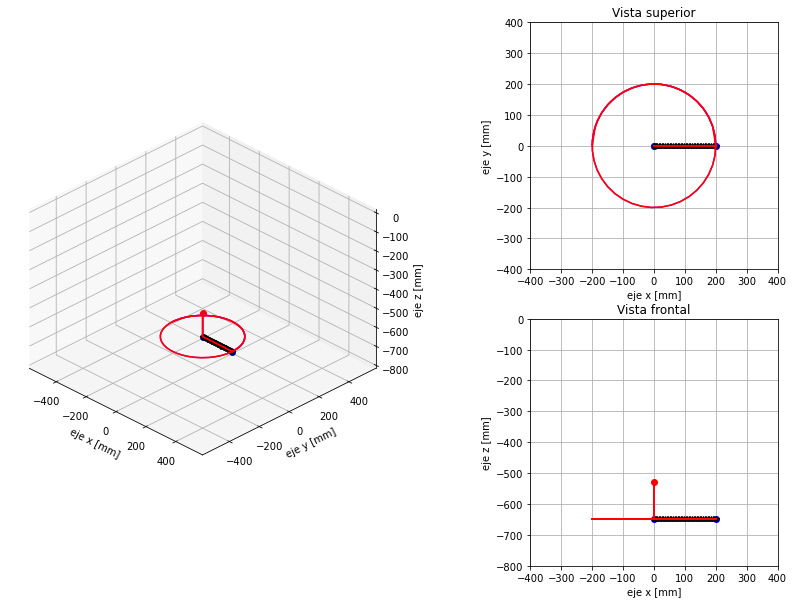

In [16]:
txv = np.append(txv,t3xv)
tyv = np.append(tyv,t3yv)
tzv = np.append(tzv,t3zv)

ax1.plot(txv,tyv,tzv,'-r')
ax2.plot(txv,tyv,'-r')
ax3.plot(txv,tzv,'-r')
fig1

In [17]:
txv,tyv,tzv

(array([   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    5.12820513,   10.25641026,   15.38461538,
          20.51282051,   25.64102564,   30.76923077,   35.8974359 ,
          41.02564103,   46.15384615,   51.28205128,   56.41025641,
          61.53846154,   66.66666667,   71.79487179,   76.92307692,
          82.05128205,   87.17948718,   92.30769

### Ejercicio

Completar la trayectoria magenta para que el robot regrese a $HOME$.

Pasos:

1. Definir punto inicial y final de la trayectoria deseada
- Inicial es P2
- Final es HOME
2. Interpolar. En este caso decidimos hacerlo de forma lineal usando linspace
- Mi trayectoria (4) se compone de t4xv, t4yv, t4zv, creados con linspace.
3. Unir la nueva trayectoria (t4xv, t4yv, t4zv) a la trayectoria completa (txv,tyv,tzv)
4. Graficar (opcional)

In [18]:
# 1. El punto inicial (P2) y el punto final (HOME) ya están definidos

# 2. interpolación lineal usando linspace, desde P2 hasta HOME

# # 3. Unir la trayectoria 4 con la general

# # 4. Graficar


## Exportar trayectoria

Ahora vamos a exportar la trayectoria a un archivo. En la solución al análisis cinemático inverso podremos importar este archivo.

In [19]:
import pickle
with open("trayectoria", "wb") as f:
    pickle.dump([[txv],[tyv],[tzv]], f)

El archivo "trayectoria deberá ser importado en el cuaderno de la solución usando

```python
import pickle
with open("trayectoria", "rb") as f:
    [[txv],[tyv],[tzv]] = pickle.load(f)
```